In [1]:
from PIL import Image
import pytesseract
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import interpolation as inter

1. Rotating the file and saving the rotated image
2. Determining the best angle and returning the rotated image

In [3]:
## Rotation and skewing the image

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

-1


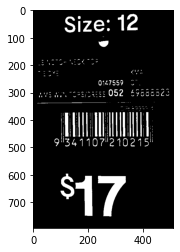

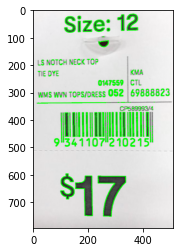

['Size: 12', '', 'LS NOTCH NECK TOP', 'TIE OYE KMA', '', '0147559 | CTL', 'WMS WYN TOPS/DRESS O52 | 69888823', '', 'wa', '', '17', '', ' ', '', ' ', '\x0c']


In [11]:
# Reading the required files and applying the skew and correction method to the i

image = cv2.imread('kmartPriceTag.jpeg')
angle, rotated = correct_skew(image)
print(angle)
cv2.imshow('rotated', rotated)
cv2.imwrite('rotated_1.jpeg', rotated)

img = cv2.imread('rotated_1.jpeg')

def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    path = '/Users/muzammil/Data/Back_Up_Muzammil/LEARNING/Colakin_Assignment/task1/preprocess'
    cv2.imwrite(os.path.join(path , 'processed_image.jpg'), img)
    return img

im_gray = gray(img)
   
im_gray = gray(img)

_, binary = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)

# plotting the gray image 
plt.imshow(binary, cmap="gray")
plt.show()
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# drawing all the contours
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
plt.show()

# Printing the results
text = pytesseract.image_to_string(image)
text = text.split('\n')
print(text)   

In the above steps we have corrected the skew and the angle of the image. 

Later, we have converted the image from RGB TO BGR as PyTeserract works for the BGR image filter, conducting the required pre-processing we later print the text on the image.

Areas to improve:

1. Improve the countours of the image in rightfully determining the image size, as irregular font are poorly detected. 
2. Improve pre-processing of the image, making the images with a fixed dpi(Dots Per Inch) for better text classification
3. Improve predictions and accuracy of the results. 

Since PyTeserract works on the RNN LSTM's, it would be interesting to see on how to build a function from scratch wihout the use of a wrapper function like teserract.